# SUPERVISED LINEAR REGRESSION WITH PYTHON (SCI-KIT Learn)

In this piece, I am going to introduce the Linear Regression Model. Our problem is about predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
Let’s start to code our model step by step. You can see sufficient information in the comment lines of the code.

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Import the Dataset
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Descriptive statistics can give you great insight into the shape of each attribute. 

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data. We can create the plot with the following script:

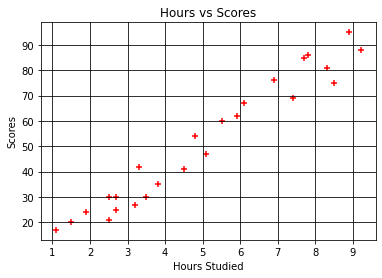

In [5]:
# Plotting the distribution of scores
X = data['Hours']
y = data['Scores']
plt.scatter(X, y, label ='Data points', color= 'r', marker= '+')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.grid(color= 'black')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = 'white'

Let's Visualize the data with SEABORN. Seaborn library provides a high-level data visualization interface where we can draw our matrix.

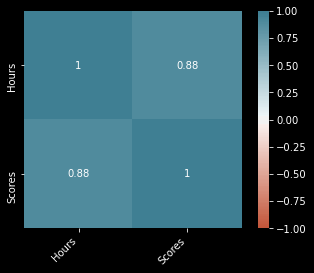

Heat map shows there is 88% correlation between Hours Studied and Scores


In [6]:
import seaborn as sb

correltn = data.corr(method = 'kendall')
ax = sb.heatmap(correltn, vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()
print('Heat map shows there is 88% correlation between Hours Studied and Scores')

# Prepare the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). 
X: independent variable vector
Y: dependent variable vector

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

The next step is to Split the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and #test subsets. %20 of the dataset to the test set

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the Data

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
# Fit Linear Regression model to our Train set
from sklearn.linear_model import LinearRegression

# Create an object called model_regressor in the LinearRegression class
model_regressor = LinearRegression()  

# FIT the linear regression model to the training set… 
# We use the FIT METHOD -> the arguments of the fit method will be training sets
model_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

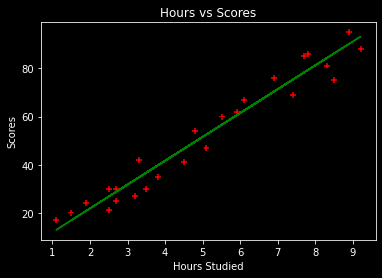

(array([9.91065648]), 2.018160041434683)

In [10]:
# Plotting the regression line
line = model_regressor.coef_ * X + model_regressor.intercept_  # y=m*x+c (mathematical formula: slope intercept)

# Plotting for the test data
plt.style.use('dark_background')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(X, y, color= 'r', marker= '+')
plt.plot(X, line, color = 'green' )
plt.grid(color='black')
plt.show()
model_regressor.coef_, model_regressor.intercept_

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions. Let's predict the Test set results.

In [11]:
# Predicting the scores
y_pred = model_regressor.predict(X_test) 
print(y_pred)

# Print the accuracy 
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(model_regressor.score(X_test, y_test)*100))

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Accuracy of linear regression classifier on test set: 94.55


In [12]:
# Compare the Actual and Predicted Data
pred_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})  
pred_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


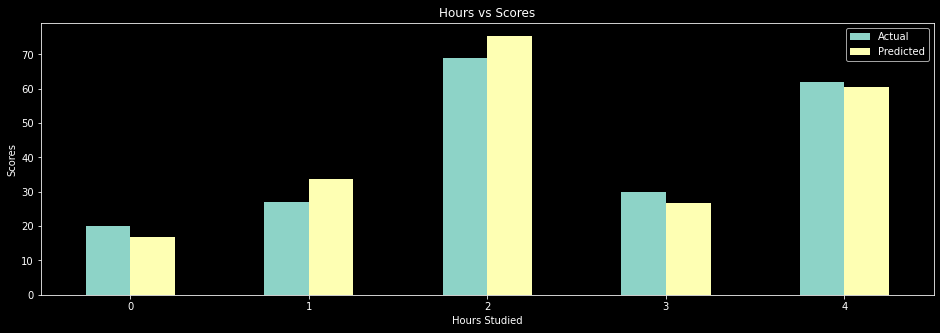

In [13]:
# Plot the Predicted and Actual Data for comparison
graph = pred_data.head()
#plt.style.use('ggplot')
plt.style.use('dark_background')
graph.plot(kind = 'bar', figsize =(16,5), rot=0)
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')
#plt.grid(which = 'both', color = 'green', linestyle = '--', linewidth= 0.5)
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.show()


In [14]:
# evaluate train and test score
print(f'The train score: {model_regressor.score(X_train, y_train)*100}')
print(f'The test score: {model_regressor.score(X_test, y_test)*100}')

The train score: 95.15510725211553
The test score: 94.54906892105356


In [15]:
# Testing with your own DATA
hours= [[9.25]]
pred = model_regressor.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Number of Hours = {}".format(pred))

Number of Hours = [[9.25]]
Predicted Number of Hours = [93.69173249]


# Evaluation of Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

Mean absolute error (MAE) , mean square errors (MSE) and Root mean square error(RMSE) are calculated.
MAE : It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
MSE : It's the average of squared differences between prediction and actual observation.

In [16]:
# error in each value
import time
for i in range(0,5):
   print("Error in value number",i,(y_test[i]-y_pred[i]))
time.sleep(1)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'Mean Absolute Error:', mean_absolute_error(y_test,y_pred))
print(f'Mean Square Error:', mean_squared_error(y_test,y_pred))
print(f'Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Error in value number 0 3.115855237601963
Error in value number 1 -6.732260779489842
Error in value number 2 -6.3570179981872315
Error in value number 3 3.2051987569597244
Error in value number 4 1.5089667227761154
Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
